In [13]:
import step1,step2,step3
from constants import *
from prophet import Prophet
import matplotlib.pyplot as plt
import riskfolio as rp

stock data are downloaded in data/<stock_name>/stock_data.csv

functions in the step1 script can fit a model on data. The user can choose the model, the data, and rerun on original:forecasted data with different timeframe

10:37:52 - cmdstanpy - INFO - Chain [1] start processing
10:37:54 - cmdstanpy - INFO - Chain [1] done processing


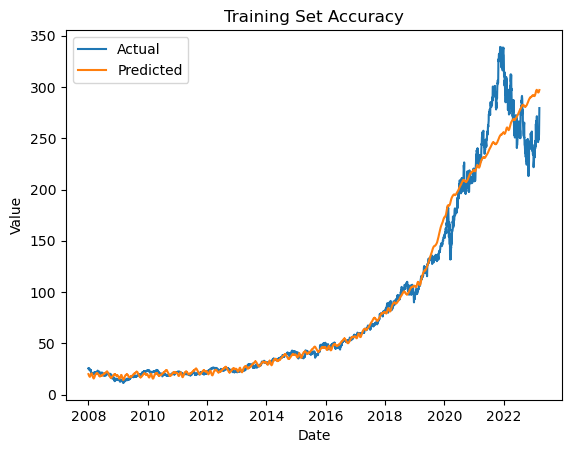

In [2]:
df=step1.load_csv('MSFT',forecaster=False)
model=step1.fit_model('MSFT',save=True)
step1.plot_training_accuracy('MSFT',save=True,show=True,forecaster=False)

In [3]:
forecast=step1.forecast('MSFT', horizon=30,save=True)

saved in: ./data/forecasted/MSFT/stock_data.csv


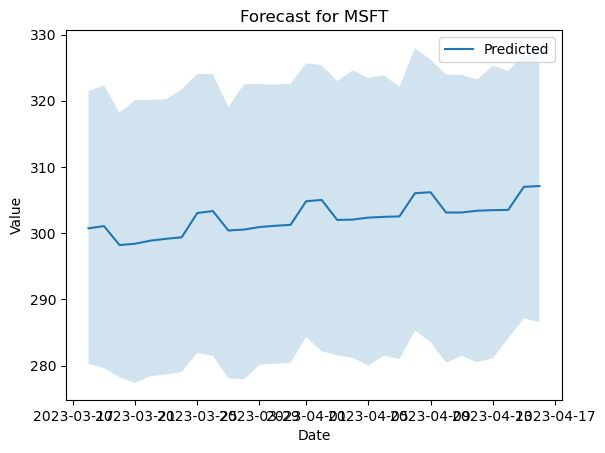

In [4]:
step1.plot_forecast('MSFT',forecast,save=True,show=True)

In [5]:
import pandas as pd
aggregated=pd.DataFrame()
for stock in company_dict.keys():
    temp=step1.load_csv(stock,forecaster=True)
    aggregated[stock]=temp['y']


In [7]:
returns=aggregated.pct_change().dropna()


In [8]:
pt=step2.build_portfolio(returns,equal_weights=True)

In [25]:
port=rp.Portfolio(returns)

In [59]:
port.mu=returns.mean().to_frame().T
port.cov=returns.cov()
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,MSFT,AMZN,GOOGL,TSLA,NVDA,JPM,JNJ,V,PG,MA,HD,UNH,PYPL,DIS,BAC,NFLX,VZ,CMCSA
weights,7.2920%,0.0000%,0.0000%,0.0000%,0.0000%,5.1414%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.7150%,69.6649%,0.0000%,0.0000%,17.1868%,0.0000%,0.0000%,0.0000%


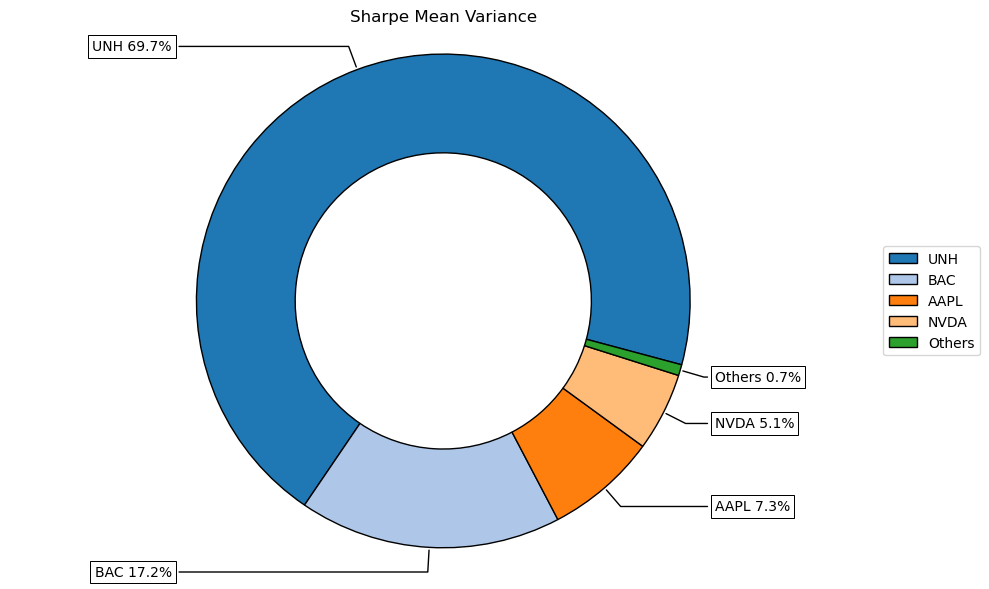

In [60]:


# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [63]:
points = 200 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,MSFT,AMZN,GOOGL,TSLA,NVDA,JPM,JNJ,V,PG,MA,HD,UNH,PYPL,DIS,BAC,NFLX,VZ,CMCSA
0,0.0002%,0.1700%,0.0000%,0.0002%,0.0001%,15.3071%,0.0002%,34.1021%,11.8295%,0.0012%,0.0004%,34.7979%,3.3163%,0.0007%,0.0001%,0.4735%,0.0001%,0.0002%,0.0003%
1,34.1610%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,49.7550%,0.0000%,0.0000%,16.0840%,0.0000%,0.0000%,0.0000%
2,53.3861%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,31.1172%,0.0000%,0.0000%,15.4968%,0.0000%,0.0000%,0.0000%
3,69.0650%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,15.9172%,0.0000%,0.0000%,15.0179%,0.0000%,0.0000%,0.0000%
4,83.5481%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,1.8766%,0.0000%,0.0000%,14.5753%,0.0000%,0.0000%,0.0000%


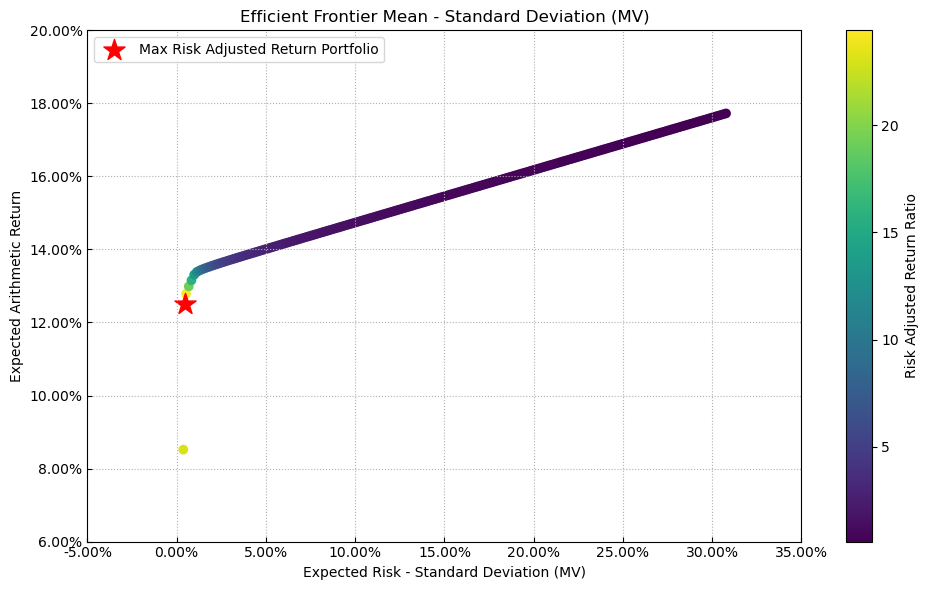

In [64]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, t_factor=252, ax=None)

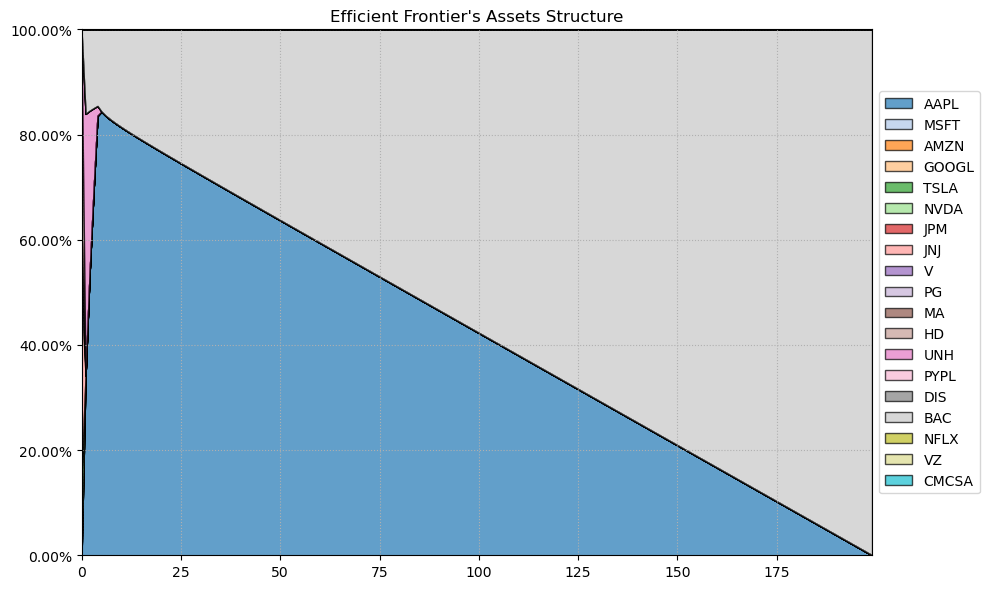

In [65]:


# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)